# Books Read in 2021

## Prep
Imports and set variables

In [1]:
import pandas as pd
import numpy as np
import seaborn
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import matplotlib.style as style
%matplotlib inline

In [2]:
style.use('seaborn')
pd.set_option('mode.chained_assignment', None)
YEAR = 2021
JAN1 = '1/1/{}'.format(YEAR)

## Get Data
Export bookshelves from Goodreads as a CSV file named books.csv and read it in.

Go to https://www.goodreads.com/review/import and click "Export Library". Rename to **books.csv**.

In [3]:
books = pd.read_csv('books.csv')
books['Date Read'] = pd.to_datetime(books['Date Read'])

## Prep Data
Fix data issues specific to current year

In [4]:
books.at[books['Title'].str.startswith('The Ghost Map'), 'Date Read'] = '12/21/2019'
books.at[books['Title'].str.startswith('Exhalation'), 'Date Read'] = '10/16/2019'
books.at[books['Title'].str.startswith('Why We Sleep'), 'Date Read'] = '12/8/2019'
books.at[books['Title'].str.startswith('High Fidelity'), 'Date Read'] = '4/21/2020'
books.at[books['Title'].str.startswith('The Ocean at the End of the Lane'), 'Date Read'] = '4/21/2020'
books.at[books['Title'].str.startswith('Conscious'), 'Original Publication Year'] = 2019
books.at[books['Title'].str.startswith('The Forgetting Machine'), 'Original Publication Year'] = 2017
books.at[books['Title'].str.startswith('A Series of Fortunate Events'), 'Original Publication Year'] = 2020
books.at[books['Title'] == 'Chances Are . . .', 'Title'] = 'Chances Are...'
books.at[books['Title'].str.startswith('My Ex-Life'), 'Date Read'] = '11/19/2021'
books.at[books['Title'].str.startswith('Forgetting Machine'), 'Title'] = "The Forgetting Machine: Memory, Perception, and the 'Jennifer Aniston Neuron'"
books['Date Read'] = pd.to_datetime(books['Date Read'])

Add Start Dates to books. The start date is in the Goodreads database, but it is not in the Export file. So, these dates need to be added manually. To simplify this, a start dict is created which can be copy/pasted as part of the next step. 

In [5]:
books[books["Title"].str.contains("The Forgetting Machine")]

,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,...,Private Notes,Read Count,Recommended For,Recommended By,Owned Copies,Original Purchase Date,Original Purchase Location,Condition,Condition Description,BCID
594,34196225,"The Forgetting Machine: Memory, Perception, an...",Rodrigo Quian Quiroga,"Quiroga, Rodrigo Quian",NaN,1944648542,9.781945e+12,0,3.73,Benbella Books,...,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


In [6]:
print('{',sep='')
for bk in books[(books['Date Read'] >= JAN1) | 
                (books['Exclusive Shelf'] == 
                 'currently-reading')]['Title'].values:
    print ('"{}":"{}",'.format(bk, JAN1))
print('}')

{
"Why Zebras Don't Get Ulcers":"1/1/2021",
"Dispatches":"1/1/2021",
"The Sound and the Fury":"1/1/2021",
"The Stranger":"1/1/2021",
"Good to Great: Why Some Companies Make the Leap... and Others Don't":"1/1/2021",
"On Killing: The Psychological Cost of Learning to Kill in War and Society":"1/1/2021",
"Stories of Your Life and Others":"1/1/2021",
"Mistakes Were Made (But Not by Me): Why We Justify Foolish Beliefs, Bad Decisions, and Hurtful Acts":"1/1/2021",
"At Home: A Short History of Private Life":"1/1/2021",
"The Upside of Irrationality: The Unexpected Benefits of Defying Logic at Work and at Home":"1/1/2021",
"The Amazing Adventures of Kavalier & Clay":"1/1/2021",
"Brave Genius: A Scientist, a Philosopher, and Their Daring Adventures from the French Resistance to the Nobel Prize":"1/1/2021",
"Naming Names":"1/1/2021",
"What If? Serious Scientific Answers to Absurd Hypothetical Questions":"1/1/2021",
"The Innovators: How a Group of Hackers, Geniuses and Geeks Created the Digital Re

Copy the above text and paste it below. Set it equal to **start_dates**. Replace the "1/1/YY" with the correct start dates. This is required because the start date is not in the downloaded CSV. It must be manually retrieved. This can be done by going to the Read list and via settings adding a column for Date Started. 

In [7]:
start_dates = {
"Dispatches":"12/28/2022",
"The Stranger":"8/24/2021",
"Stories of Your Life and Others":"6/12/2021",
"Mistakes Were Made (But Not by Me): Why We Justify Foolish Beliefs, Bad Decisions, and Hurtful Acts":"12/14/2021",
"The Amazing Adventures of Kavalier & Clay":"3/26/2021",
"Brave Genius: A Scientist, a Philosopher, and Their Daring Adventures from the French Resistance to the Nobel Prize":"5/16/2021",
"Dead Wake: The Last Crossing of the Lusitania":"10/24/2021",
"The Sympathizer":"1/15/2021",
"Patient H.M.: A Story of Memory, Madness, and Family Secrets":"1/30/2021",
"The Earth Is Weeping: The Epic Story of the Indian Wars for the American West":"9/24/2021",
"A Gentleman in Moscow":"8/21/2021",
"The Forgetting Machine: Memory, Perception, and the \"Jennifer Aniston Neuron\"":"1/18/2021",
"Mislaid":"11/25/2021",
"My Ex-Life":"11/13/2021",
"The Spy and the Traitor: The Greatest Espionage Story of the Cold War":"8/4/2021",
"The Practicing Stoic: A Philosophical User's Manual":"12/27/2020",
"Unthinkable: An Extraordinary Journey Through the World's Strangest Brains":"7/10/2021",
"Three Women":"9/14/2021",
"How Emotions Are Made: The Secret Life of the Brain":"6/30/2021",
"Empire of Pain: The Secret History of the Sackler Dynasty":"4/24/2021",
"Hidden Valley Road: Inside the Mind of an American Family":"10/2/2021",
"Black Boy":"12/16/2021",
"Caste: The Origins of Our Discontents":"8/15/2021",
"This Is How They Tell Me the World Ends: The Cyberweapons Arms Race":"12/28/2021",
"November Road":"7/12/2021",
"Noise: A Flaw in Human Judgment":"5/20/2021",
"Crossroads":"10/6/2021",
"The Premonition: A Pandemic Story":"5/9/2021",
}

Verify that you filled in all of the dates

In [8]:
all_updated = True
for t, d in start_dates.items():
    if d == JAN1:
        print('Unchanged: ', t)
        all_updated = False
if all_updated:
    print('All start dates have been updated.')

All start dates have been updated.


Populate the Date Started column.

In [9]:
books['Date Started'] = books['Title'].map(start_dates)
books['Date Started'] = pd.to_datetime(books['Date Started'])

Remove unnecessary columns

In [10]:
for c in ('ISBN','ISBN13','Publisher','Binding', 'Book Id', 'My Review', 
          'Spoiler', 'Private Notes','Recommended For', 'Recommended By', 
          'Owned Copies', 'Original Purchase Date', 'Original Purchase Location', 
          'Condition', 'Condition Description', 'BCID'):
    try:
        del books[c]
    except:
        pass

## Filter Books
Downselect list of books that were either finished in current year or were started in current year and not finished. 

In [11]:
date_columns = ['Date Read', 'Date Added', 
                'Date Started']
for c in date_columns:
    books[c] = pd.to_datetime(books[c])

In [12]:
books = books.dropna(subset=['Date Read', 'Date Started'], how='all')

In [13]:
books = books[(books['Date Read'] >= JAN1)
              | ((books['Exclusive Shelf'] =='currently-reading')
                 & (books['Date Started'] >= JAN1))]

Manual removal. This is where can manually remove books you do not want in the plots.

In [14]:
to_remove = [
    'The Fall of Berlin 1945',
    'This Is How They Tell Me the World Ends: The Cyberweapons Arms Race',
    'Dispatches'
    ]
books = books.drop(books[books.Title.isin(to_remove)].index)

In [15]:
books['Finished'] = books['Date Read'].notnull()
# if book has not been finished, set Date Read to Dec 31. This is done for plotting purposes. 
books['Date Read'] = books['Date Read'].fillna(datetime.datetime(YEAR,12,31))

## List the Books

In [16]:
books_ = books[books['Finished'] == True].reset_index(drop=True)
books_['Original Publication Year'] = books_['Original Publication Year'].fillna(0)
books_.sort_values(by='Date Read',ascending=True,inplace=True)
for row in books_.iterrows():
    row = row[1]
    print ('%s by %s (%i)'%(row['Title'],row['Author'],row['Original Publication Year']))

The Practicing Stoic: A Philosophical User's Manual by Ward Farnsworth (2018)
The Forgetting Machine: Memory, Perception, and the "Jennifer Aniston Neuron" by Rodrigo Quian Quiroga (2017)
Patient H.M.: A Story of Memory, Madness, and Family Secrets by Luke Dittrich (2016)
The Sympathizer by Viet Thanh Nguyen (2015)
Empire of Pain: The Secret History of the Sackler Dynasty by Patrick Radden Keefe (2021)
The Premonition: A Pandemic Story by Michael   Lewis (2021)
Noise: A Flaw in Human Judgment by Daniel Kahneman (2021)
The Amazing Adventures of Kavalier & Clay by Michael Chabon (2000)
Stories of Your Life and Others by Ted Chiang (2002)
November Road by Lou Berney (2018)
Unthinkable: An Extraordinary Journey Through the World's Strangest Brains by Helen  Thomson (2018)
Brave Genius: A Scientist, a Philosopher, and Their Daring Adventures from the French Resistance to the Nobel Prize by Sean B. Carroll (2013)
The Spy and the Traitor: The Greatest Espionage Story of the Cold War by Ben Ma

## Book Order for Covers
The book covers are ordered by finish date starting with the most recently finished.
Below is the order list (needed for `Cover Art Prep.ipynb`)

In [17]:
books[books.Finished == True].sort_values('Date Read', ascending=False).reset_index()['Title'].to_frame()

,Title
0,Black Boy
1,Mistakes Were Made (But Not by Me): Why We Jus...
2,How Emotions Are Made: The Secret Life of the ...
3,Mislaid
4,My Ex-Life
5,Dead Wake: The Last Crossing of the Lusitania
6,Hidden Valley Road: Inside the Mind of an Amer...
7,The Earth Is Weeping: The Epic Story of the In...
8,Crossroads
9,Three Women


## Calculations
Calculate Time to Read

In [18]:
# Add a day to make it inclusive
books['Time to Read'] = (books['Date Read'] - books['Date Started']) + datetime.timedelta(days=1)
# if book has not been finished then set Time to Read to 0 days.
books['Time to Read'] = books['Time to Read'].where(books['Finished'] == True, datetime.timedelta(days=0))

Calculate Pages Read per Day

In [19]:
books['Pages per Day'] = (books['Number of Pages'] / 
                          [x.days for x in books['Time to Read']])

Create a short title for some of the plots.

In [20]:
books['Title (short)'] = books['Title'].apply(lambda x: x.split(':')[0])
books['Title (short)'] = books['Title (short)'].str.replace(r" \(.*\)","",regex=True)

Sort books

In [21]:
books.sort_values(by='Date Started',ascending=False,inplace=True)

## Some Stats

In [22]:
print(f"In total: {len(books[books['Finished'] == True])} books, {books.loc[books['Finished'] == True, 'Number of Pages'].sum():,.0f} pages.")
print(f"Avg: {books.loc[books['Finished'] == True, 'Number of Pages'].sum() / len(books[books['Finished'] == True]):,.0f} pages")

In total: 26 books, 10,354 pages.
Avg: 398 pages


## Plotting

In [23]:
finished_color, unfinished_color = "#4C72B0","#CCB974"
mapper = {True:finished_color, False:unfinished_color}
s = books['Finished'].map(mapper)
s[books['Date Started'] < datetime.datetime(YEAR,1,1)] = "#55A868"
clist = list(s)
ylabel_colors = ['black' if f else 'gray' for f in books['Finished']]

### Books Across the Year

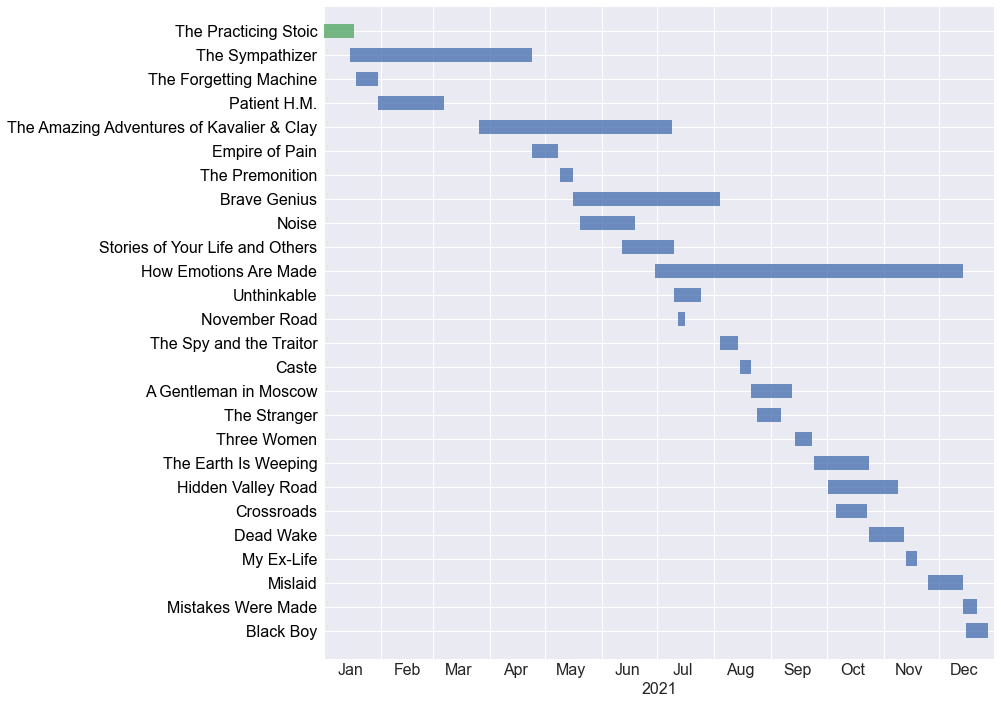

In [25]:
def _create_date(date):
    """Creates the date"""
    try:
        date = pd.to_datetime(date)
    except:
        pass
    if date < datetime.datetime(YEAR, 1, 1):
        date = datetime.datetime(YEAR, 1, 1)
    mdate = dates.date2num(date) 
    return mdate

ylabels = list(books['Title (short)'])
start_dates = list(books['Date Started'])
end_dates = list(books['Date Read'])

ilen = len(ylabels)
pos = np.arange(0.5,ilen*0.5+0.5,0.5)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
for i in range(ilen):
    start_date,end_date = _create_date(start_dates[i]), _create_date(end_dates[i])
    ax.barh((i*0.5)+0.5, max(end_date - start_date, 1), label=ylabels[i], left=start_date, height=0.3, 
            align='center', alpha = 0.8, color=clist[i])
locsy, labelsy = plt.yticks(pos, ylabels)
plt.setp(labelsy, fontname="Arial", fontsize = 16)
ax.set_ylim(bottom=-0.1, top=ilen*0.5+0.5)
[t.set_color(c) for c, t in zip(ylabel_colors, ax.yaxis.get_ticklabels())]

ax.xaxis_date()
ax.set_xlim(left=_create_date(datetime.datetime(YEAR, 1, 1)),
           right=_create_date(datetime.datetime(YEAR, 12, 31)))
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

# plt.title('{} Reading'.format(YEAR), fontname="Arial", fontsize=20)
plt.title(None)
plt.xlabel(YEAR, fontsize=16)

for tick in ax.xaxis.get_minor_ticks():
    tick.label.set_fontsize(16) 
    
plt.savefig('books_timeline_ea.png', format='png', bbox_inches='tight', facecolor='#EAEAEA')

### Book Ratings

Average Personal Goodread Rating: 0.7307692307692307
Average Site Goodread Rating: 4.07


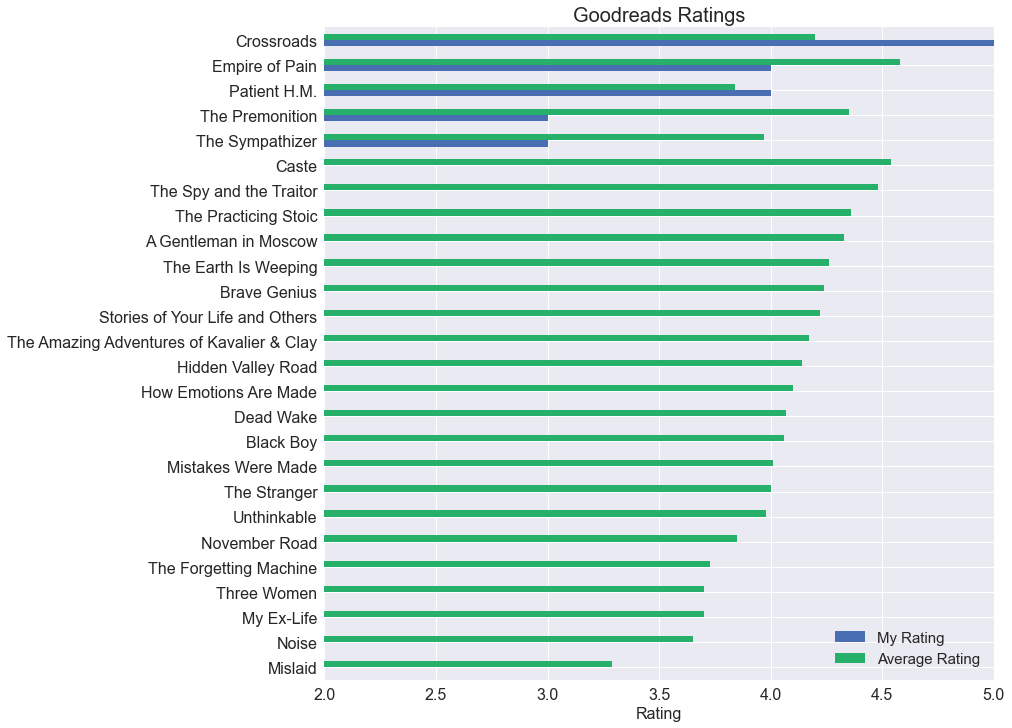

In [26]:
books_ = books[books['Finished'] == True]
books_ = books_.set_index('Title (short)',drop=True).sort_values(by=['My Rating',
                                                                     'Average Rating'],ascending=True)
ax = books_[['My Rating','Average Rating']].plot(kind='barh',
                                                 xlim=(2,5),
                                                 figsize=(12,12),
                                                 fontsize=16,
                                                 color=('#4A6EB2', '#26B069'))
ax.yaxis.label.set_visible(False)
plt.xlabel('Rating', fontsize=16)
plt.title('Goodreads Ratings', fontsize=20);
mpl.rcParams['legend.fontsize'] = 'large'
print ('Average Personal Goodread Rating:',books_['My Rating'].mean())
print ('Average Site Goodread Rating:',books_['Average Rating'].mean())
plt.legend(fontsize=15)

plt.savefig('ratings_ea.png', format='png', bbox_inches='tight', facecolor='#EAEAEA')

### Number of Pages

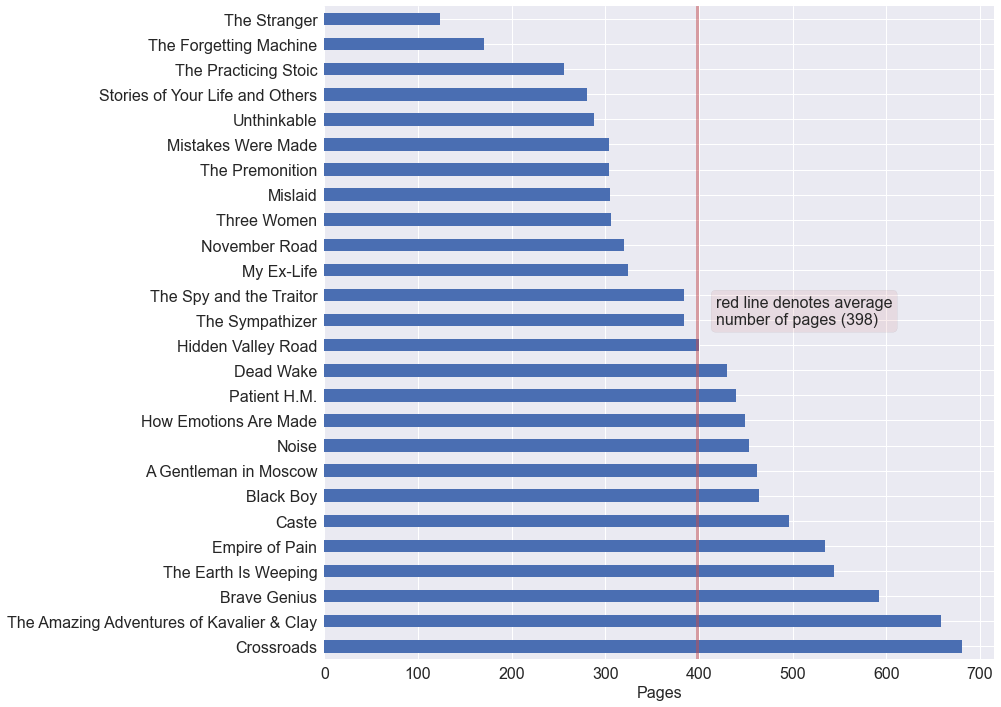

In [27]:
books_ = books[books['Finished'] == True]
avg = books_['Number of Pages'].mean()
books_ = books_.set_index('Title (short)')
ax = books_['Number of Pages'].sort_values(ascending=False).plot(kind='barh',
                                                                 title='Number of Pages',
                                                                 figsize=(12,12),
                                                                 fontsize=16,
                                                                 color='#4A6EB2')
ax.yaxis.label.set_visible(False)

plt.axvline(x=avg,linewidth=3, color="#C44E52",alpha=0.5)
props = dict(boxstyle='round', facecolor="#C44E52", alpha=0.1)
ax.text(avg+20, 14, 'red line denotes average\nnumber of pages ({:.0f})'.format(avg),
        verticalalignment='top',horizontalalignment='left', bbox=props, fontname="Arial", fontsize=16)
plt.xlabel('Pages', fontsize=16)
# plt.title('Number of Pages', fontname="Arial", fontsize=20)
plt.title(None)

plt.savefig('num_pages_ea.png', format='png', bbox_inches='tight', facecolor='#EAEAEA')

In [28]:
print(f'This year you read {len(books_)} books with a total page count of {books_["Number of Pages"].sum():,.0f} and and average ' +
      f'number of pages of {books_["Number of Pages"].mean():,.1f} per book.')

This year you read 26 books with a total page count of 10,354 and and average number of pages of 398.2 per book.


/var/folders/tb/3lm9_d455m9dd6yvc906dll99cffj5/T/ipykernel_33250/4222668126.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:3.0f}%'.format(x*100) for x in vals]);


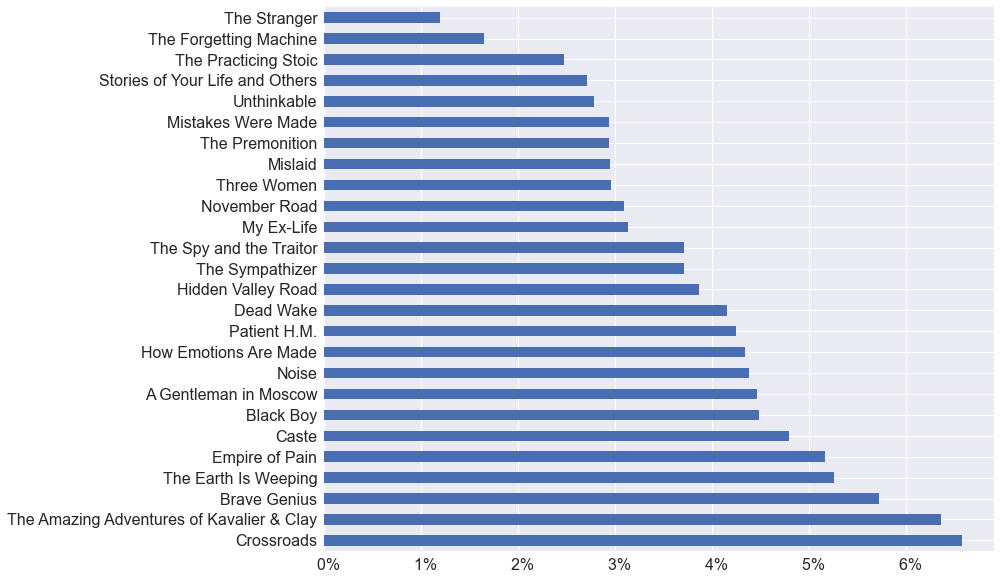

In [29]:
# Note: if the UserWarning is explained here 
# https://stackoverflow.com/questions/63723514/userwarning-fixedformatter-should-only-be-used-together-with-fixedlocator

books_ = books[books['Finished'] == True]

books_.loc[:, 'Percent'] = books_['Number of Pages'] / books_['Number of Pages'].sum()
books_ = books_.set_index('Title (short)')
ax = books_['Percent'].sort_values(ascending=False).plot(kind='barh', 
                                                         figsize=(12,10),
                                                         fontsize=16,
                                                         color='#4A6EB2')
ax.yaxis.label.set_visible(False)
vals = ax.get_xticks()
ax.set_xticklabels(['{:3.0f}%'.format(x*100) for x in vals]);

Average Number of Pages over Year: 28.367123287671234


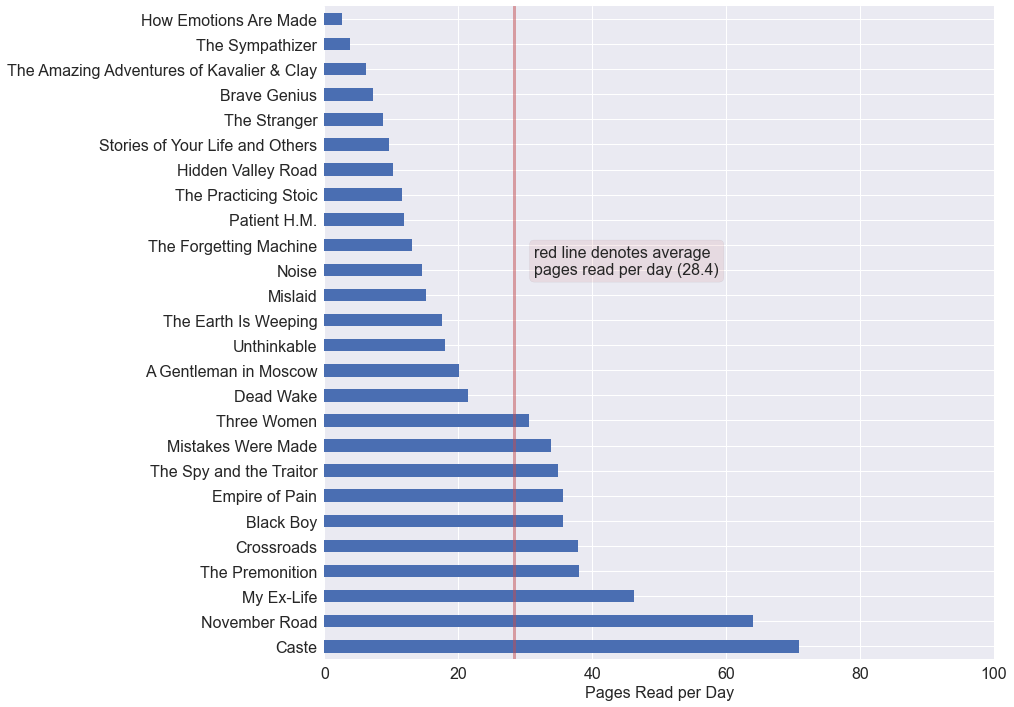

In [30]:
books_ = books[books['Finished'] == True]
books_ = books_.set_index('Title (short)')
avg = books_['Number of Pages'].sum()/365
ax = books_['Pages per Day'].sort_values(ascending=False).plot(kind='barh',
                                                               xlim=(0,100),
                                                               figsize=(12,12),
                                                               fontsize=16,
                                                               color='#4A6EB2')
ax.yaxis.label.set_visible(False)
# plt.title('Reading Rate: Pages Read per Day', fontsize=20)
plt.title(None)
# BELOW code used if one is "off the charts" and the x scale needs to be set such that one is too long
# mpd = books_.loc[XXX,'Pages per Day']
# mpd = str(mpd)+'->'
# ax.text(90,0.2,mpd,color='white',fontdict={'size':8,'weight':'bold'},
#         verticalalignment='top',horizontalalignment='left')

plt.axvline(x=avg,linewidth=3, color="#C44E52",alpha=0.5)
props = dict(boxstyle='round', facecolor="#C44E52", alpha=0.1)
ax.text(avg+3, 16, 'red line denotes average\npages read per day ({:.1f})'.format(avg),
        verticalalignment='top',horizontalalignment='left', bbox=props, fontsize=16)
ax.set_xlabel('Pages Read per Day', fontsize=16)
print ('Average Number of Pages over Year:',avg)

plt.savefig('pages_per_day_ea.png', format='png', bbox_inches='tight', facecolor='#EAEAEA')

### Publication Dates

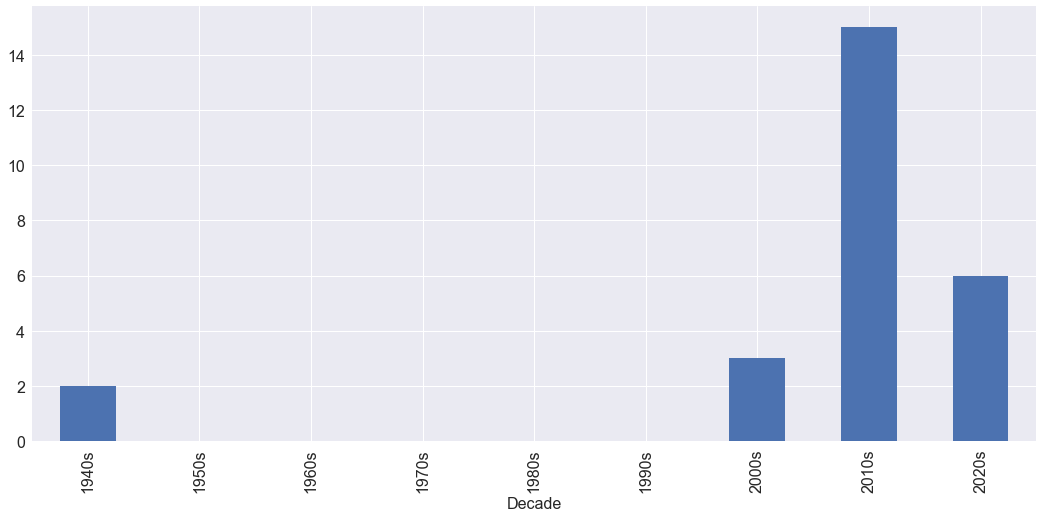

In [32]:
books_ = books[books['Finished'] == True]
books_['Original Publication Year'] = books_['Original Publication Year'].astype(int)
decade = 10 * (books['Original Publication Year'] // 10)
decade = decade.astype(int).astype(str) + 's'
decade.name = 'Decade'
published = books.groupby(decade).count()['Title']
published.name = 'Count'

all_years = list(range(books_['Original Publication Year'].min(), books_['Original Publication Year'].max() + 1))
all_decades = []
for y in all_years:
    decade = 10 * (y // 10)
    all_decades.append(decade)
all_decades = list(set(all_decades))
all_decades = [str(d) + 's' for d in sorted(all_decades)]

published = published.reindex(all_decades).fillna(0)

ax = published.plot(kind='bar',figsize=(18,8),fontsize=14)
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
ax.set_xlabel('Decade', fontsize=16);

## Some Stats
Average Number of Pages per Day over Year

In [33]:
# prorate carry-over books
books_ = books[books['Finished'] == True]
carry_overs = books_[books_['Date Started'] < JAN1]
new_start = datetime.datetime(YEAR,1,1)

carry_overs.loc[:,'Number of Pages'] = (carry_overs['Number of Pages'] * 
                                        (((carry_overs['Date Read'] - 
                                           new_start).map(lambda x: x.days) +1) / 
                                         ((carry_overs['Date Read'] - 
                                           carry_overs['Date Started']).map(lambda x: x.days)+1))).values
books_['Number of Pages'].update(carry_overs['Number of Pages'])
print('Average Number of Pages per Day over Year:', books_['Number of Pages'].sum()/365)

Average Number of Pages per Day over Year: 28.20772104607721
